In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import re

rcParams['figure.figsize'] = 15, 20

In [78]:
df = pd.read_csv('../data/Marvel_Comics.csv')

In [79]:
df.head()

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",None,Marvel Universe,Infinite Comic,None,Free
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,None,Marvel Universe,Infinite Comic,Rated T+,Free
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,None,Free
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,None,Free


In [80]:
df['year'] = df['publish_date'].apply(lambda x: str(x)[-4:])

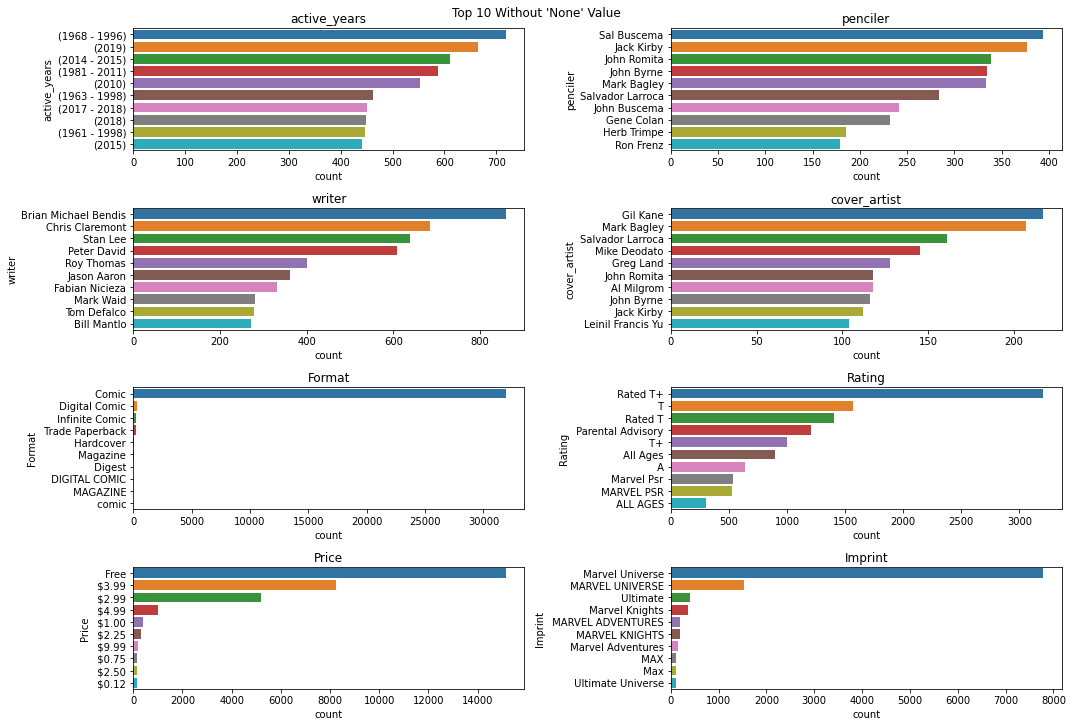

In [84]:
for i,column in enumerate(columns):
    plt.subplot(len(columns), 2, i+1)
    plt.suptitle("Top 10 Without 'None' Value")
    sns.countplot(data=df, y=column, order=df[~(df[column]=='None')][column].value_counts().iloc[:10].index)
    plt.title(f"{column}")
    plt.tight_layout()

## Recommendation System Base On Description

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [118]:
df['issue_description'] = df['issue_description'].apply(lambda x: str.lower(x))

In [119]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['issue_description'])

In [120]:
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [123]:
indices = pd.Series(df.index, index=df['issue_title']).drop_duplicates()

In [124]:
def get_recommendations(title, ind=indices ,cosine_sim=cosine_sim):
    idx = ind[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    comic_indices = [i[0] for i in sim_scores]
    return df['issue_title'].iloc[comic_indices]

In [125]:
df['issue_title']

0        A Year of Marvels: April Infinite Comic (2016) #1
1        A Year of Marvels: August Infinite Comic (2016...
2        A Year of Marvels: February Infinite Comic (20...
3         A Year of Marvels: July Infinite Comic (2016) #1
4         A Year of Marvels: June Infinite Comic (2016) #1
                               ...                        
34987              Ziggy Pig - Silly Seal Comics (2019) #1
34988                                     Zombie (2006) #4
34989                                     Zombie (2006) #3
34990                                     Zombie (2006) #2
34991                                     Zombie (2006) #1
Name: issue_title, Length: 34992, dtype: object

In [127]:
get_recommendations('Avengers & the Infinity Gauntlet (2010) #1')

16684         Marvel's Avengers: Endgame Prelude (2018) #1
14154     Lockjaw and the Pet Avengers Unleashed (2010) #4
31399            Warlock and the Infinity Watch (1992) #36
14147               Lockjaw and the Pet Avengers (2017) #7
16426    Marvel Universe Avengers Assemble Season Two (...
25976                                     Thanos (2016) #2
5638                                   Contagion (2019) #2
30880                                Universe X (2000) #10
11654                  Hulk/Wolverine: Six Hours (2003) #4
25984                              Thanos Annual (2014) #1
Name: issue_title, dtype: object

## Recommendation System Base On Comic Atrribute


In [152]:
AttrCols = ['penciler','writer','cover_artist','Imprint','Format','Rating']

In [153]:
def clean_data(x):
    x = str.lower(x.replace(" ", ""))
    x = re.sub("none", '', x)
    x = re.sub(",", ' ', x)
    return x

In [154]:
for AttrCol in AttrCols:
    df[AttrCol] = df[AttrCol].apply(clean_data)

In [155]:
def create_soup(x):
    return x['penciler'] + ' ' + x['writer'] + ' ' + x['cover_artist'] + ' ' + x['Imprint'] + ' ' + x['Format'] + ' ' + x['Rating']

In [156]:
df['Soup'] = df.apply(create_soup, axis=1)

In [157]:
df['Soup']

0        yvesbigerel yvesbigerel jamalcampbell marvelun...
1        jamalcampbell chrissims chadbowers  marveluniv...
2        danilos.beyruth mmast ryannorth  marvelunivers...
3        juananramirez chuckwendig jamalcampbell marvel...
4        diegoolortegui paulallor jamalcampbell marvelu...
                               ...                        
34987    jacobchabot johncerilli franktieri nicklein ma...
34988    kylehotz mikeraicht kylehotz max comic explici...
34989    kylehotz mikeraicht kylehotz max comic explici...
34990    kylehotz mikeraicht kylehotz max comic explici...
34991    kylehotz mikeraicht kylehotz max comic explici...
Name: Soup, Length: 34992, dtype: object

In [158]:
def rem_double_space(x):
    return re.sub(' +', ' ',x)

df['Soup'] = df['Soup'].apply(rem_double_space)

In [159]:
df['Soup']

0        yvesbigerel yvesbigerel jamalcampbell marvelun...
1        jamalcampbell chrissims chadbowers marvelunive...
2        danilos.beyruth mmast ryannorth marveluniverse...
3        juananramirez chuckwendig jamalcampbell marvel...
4        diegoolortegui paulallor jamalcampbell marvelu...
                               ...                        
34987    jacobchabot johncerilli franktieri nicklein ma...
34988    kylehotz mikeraicht kylehotz max comic explici...
34989    kylehotz mikeraicht kylehotz max comic explici...
34990    kylehotz mikeraicht kylehotz max comic explici...
34991    kylehotz mikeraicht kylehotz max comic explici...
Name: Soup, Length: 34992, dtype: object

In [160]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['Soup'])

In [161]:
cosine_sim2 = linear_kernel(count_matrix,count_matrix)

In [162]:
indices2 = pd.Series(df.index, index=df['issue_title']).drop_duplicates()

### Based on penciler,writer,cover_artist,Imprint,Format and Rating

In [168]:
get_recommendations('Avengers & the Infinity Gauntlet (2010) #4',ind=indices2, cosine_sim=cosine_sim2)

1757         Avengers & the Infinity Gauntlet (2010) #3
1758         Avengers & the Infinity Gauntlet (2010) #2
19117                         Not Brand Echh (2017) #14
1759         Avengers & the Infinity Gauntlet (2010) #1
16559    Marvel Universe Ultimate Spider-Man (2012) #11
16560    Marvel Universe Ultimate Spider-Man (2012) #10
16561     Marvel Universe Ultimate Spider-Man (2012) #9
16564     Marvel Universe Ultimate Spider-Man (2012) #6
12             A Year of Marvels: The Uncanny (2016) #1
48                                    A-Next (1998) #12
Name: issue_title, dtype: object